## 1. Install packages

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.184  Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (Quadro RTX 4000, 8192MiB)
Setup complete  (20 CPUs, 127.7 GB RAM, 354.0/1042.7 GB disk)


In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

## 2. Test Yolov8

In [3]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'


  0%|          | 0.00/6.23M [00:00<?, ?B/s]
  3%|▎         | 184k/6.23M [00:00<00:03, 1.87MB/s]
 12%|█▏        | 744k/6.23M [00:00<00:01, 4.13MB/s]
 20%|█▉        | 1.24M/6.23M [00:00<00:01, 4.68MB/s]
 27%|██▋       | 1.70M/6.23M [00:00<00:01, 2.91MB/s]
 40%|███▉      | 2.49M/6.23M [00:00<00:01, 3.91MB/s]
 50%|████▉     | 3.10M/6.23M [00:00<00:00, 4.52MB/s]
 71%|███████▏  | 4.45M/6.23M [00:00<00:00, 6.99MB/s]
 83%|████████▎ | 5.20M/6.23M [00:01<00:00, 7.24MB/s]
100%|██████████| 6.23M/6.23M [00:01<00:00, 6.11MB/s]
Ultralytics YOLOv8.0.184  Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (Quadro RTX 4000, 8192MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients


  0%|          | 0.00/165k [00:00<?, ?B/s]
 73%|███████▎  | 120k/165k [00:00<00:00, 1.17MB/s]
100%|██████████| 165k/165k [00:00<00:00, 1.45MB/s]
image 1/1 d:\Research\ActionRecognization\Classification_Vit\Yolo_research\zidane.jpg: 384x640 2 persons, 1 tie, 51.9ms
Speed: 2.0ms preprocess, 51.9ms inference, 5.0ms pos

### Run prediction

In [3]:
model = YOLO("yolov8n.pt")
results = model("https://ultralytics.com/images/bus.jpg")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 d:\Research\ActionRecognization\Classification_Vit\Yolo_research\bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 59.3ms
Speed: 0.0ms preprocess, 59.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


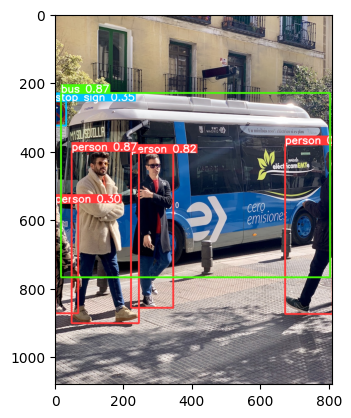

In [4]:
res = results[0].plot()
img = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 3. Get data

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="xTst9bjGE20I0ulPMV30")
# project = rf.workspace("seminar-object-detection").project("cars-o1ljf")
# dataset = project.version(1).download("yolov8")


## 4. Train model

### 4.1. Load model and data

In [5]:
model = YOLO("yolov8n.pt")

In [6]:
model.train(data="D:\Research\ActionRecognization\Classification_Vit\Yolo_research\dataset\data.yaml", epochs=3)

Ultralytics YOLOv8.0.184  Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (Quadro RTX 4000, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\Research\ActionRecognization\Classification_Vit\Yolo_research\dataset\data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000262DF9150D0>
fitness: 0.6174311621632433
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.61222,     0.56233])
names: {0: 'cars', 1: 'truck'}
plot: True
results_dict: {'metrics/precision(B)': 0.8588861560161178, 'metrics/recall(B)': 0.8319883337916828, 'metrics/mAP50(B)': 0.8887968981643561, 'metrics/mAP50-95(B)': 0.5872794137186752, 'fitness': 0.6174311621632433}
save_dir: WindowsPath('runs/detect/train')
speed: {'preprocess': 0.8494046426588489, 'inference': 2.2656597116942048, 'loss': 0.005360572568831905, 'postprocess': 5.915077783728158}

## 5. Prediction values

In [2]:
model = YOLO("D:\\Research\\ActionRecognization\\Classification_Vit\\Yolo_research\\runs\detect\\train\\weights\\best.pt")


image 1/1 D:\Research\ActionRecognization\Classification_Vit\Yolo_research\dataset\test\images\IMG_20150312_165650_jpg.rf.3fb03329de0562312d04812960f3a7cf.jpg: 640x640 1 truck, 45.9ms
Speed: 4.0ms preprocess, 45.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


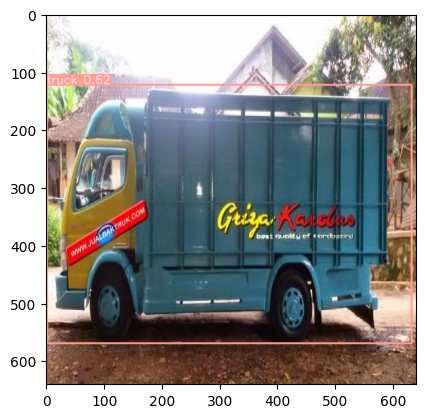

In [12]:
results = model("D:\\Research\ActionRecognization\\Classification_Vit\\Yolo_research\dataset\\test\images\\IMG_20150312_165650_jpg.rf.3fb03329de0562312d04812960f3a7cf.jpg")
res = results[0].plot()
img = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 6. Export

Export a YOLOv8 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLOv8 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://onnx.ai/) or [OpenVINO](https://docs.openvino.ai/latest/index.html) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://developer.nvidia.com/tensorrt) for up to 5x GPU speedup.


| Format                                                             | `format` Argument | Model                     | Metadata | Arguments                                           |
|--------------------------------------------------------------------|-------------------|---------------------------|----------|-----------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                    | -                 | `yolov8n.pt`              | ✅        | -                                                   |
| [TorchScript](https://pytorch.org/docs/stable/jit.html)            | `torchscript`     | `yolov8n.torchscript`     | ✅        | `imgsz`, `optimize`                                 |
| [ONNX](https://onnx.ai/)                                           | `onnx`            | `yolov8n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`     |
| [OpenVINO](https://docs.openvino.ai/latest/index.html)             | `openvino`        | `yolov8n_openvino_model/` | ✅        | `imgsz`, `half`                                     |
| [TensorRT](https://developer.nvidia.com/tensorrt)                  | `engine`          | `yolov8n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace` |
| [CoreML](https://github.com/apple/coremltools)                     | `coreml`          | `yolov8n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`                      |
| [TF SavedModel](https://www.tensorflow.org/guide/saved_model)      | `saved_model`     | `yolov8n_saved_model/`    | ✅        | `imgsz`, `keras`                                    |
| [TF GraphDef](https://www.tensorflow.org/api_docs/python/tf/Graph) | `pb`              | `yolov8n.pb`              | ❌        | `imgsz`                                             |
| [TF Lite](https://www.tensorflow.org/lite)                         | `tflite`          | `yolov8n.tflite`          | ✅        | `imgsz`, `half`, `int8`                             |
| [TF Edge TPU](https://coral.ai/docs/edgetpu/models-intro/)         | `edgetpu`         | `yolov8n_edgetpu.tflite`  | ✅        | `imgsz`                                             |
| [TF.js](https://www.tensorflow.org/js)                             | `tfjs`            | `yolov8n_web_model/`      | ✅        | `imgsz`                                             |
| [PaddlePaddle](https://github.com/PaddlePaddle)                    | `paddle`          | `yolov8n_paddle_model/`   | ✅        | `imgsz`                                             |
| [ncnn](https://github.com/Tencent/ncnn)                            | `ncnn`            | `yolov8n_ncnn_model/`     | ✅        | `imgsz`, `half`                                     |


In [3]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.184  Python-3.8.10 torch-2.0.1+cu117 CPU (Intel Core(TM) i9-10900X 3.70GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients

PyTorch: starting from 'D:\Research\ActionRecognization\Classification_Vit\Yolo_research\runs\detect\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)

ONNX: starting export with onnx 1.12.0 opset 17...
ONNX: export success  0.9s, saved as 'D:\Research\ActionRecognization\Classification_Vit\Yolo_research\runs\detect\train\weights\best.onnx' (11.7 MB)

Export complete (4.1s)
Results saved to D:\Research\ActionRecognization\Classification_Vit\Yolo_research\runs\detect\train\weights
Predict:         yolo predict task=detect model=D:\Research\ActionRecognization\Classification_Vit\Yolo_research\runs\detect\train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=D:\Research\ActionRecognization\Classification_Vit\Yolo_research\runs\detect\train\weights\

============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

